# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from fitter import Fitter, get_common_distributions, get_distributions

2023-05-29 22:28:21.495476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Dataset

## Obtaining the dataset

In [2]:
# getting the dataset from the csv file
data = pd.read_csv('Lab6-Proj1_Dataset.csv')

In [3]:
data.tail()

Anchor_Ratio  Transmission_Range  Node_Density  Step_Size  Iterations  \
280          0.15               18.40          0.01        1.0           6   
281          0.15               18.40          0.01        1.2           6   
282          0.18               26.45          0.01        0.9           6   
283          0.18               26.45          0.01        1.0           6   
284          0.18               26.45          0.01        1.2           6   

         ESLE  
280  2.420293  
281  2.427482  
282  1.690174  
283  1.707076  
284  1.712146

### Statistical Analysis of the dataset  

In [4]:
# shape
print(data.shape)

# quick statistical analysis of the dataset
data.describe()

(285, 6)


Anchor_Ratio  Transmission_Range  Node_Density   Step_Size  Iterations  \
count    285.000000          285.000000    285.000000  285.000000  285.000000   
mean       0.207474           20.554737      0.015158    1.033333   37.536842   
std        0.065472            3.410259      0.006796    0.124941   24.104881   
min        0.140000           17.250000      0.010000    0.900000    6.000000   
25%        0.150000           17.250000      0.010000    0.900000   20.000000   
50%        0.180000           20.700000      0.010000    1.000000   30.000000   
75%        0.300000           23.000000      0.020000    1.200000   60.000000   
max        0.300000           28.750000      0.030000    1.200000   90.000000   

               ESLE  
count  2.850000e+02  
mean   1.220366e+00  
std    1.536450e+00  
min    8.900000e-08  
25%    7.837210e-01  
50%    1.054853e+00  
75%    1.360695e+00  
max    2.500000e+01

General Boxplot

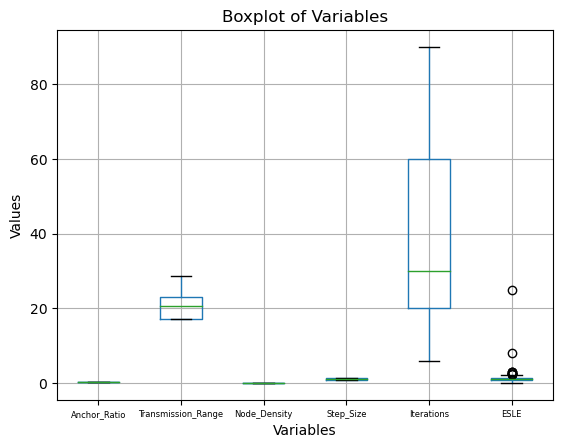

In [5]:
# generating the boxplot
data.boxplot()

# setting the plot title and axes labels
plt.title('Boxplot of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(fontsize=6)

# displaying the plot
plt.show()

Individual Boxplots for better visualization

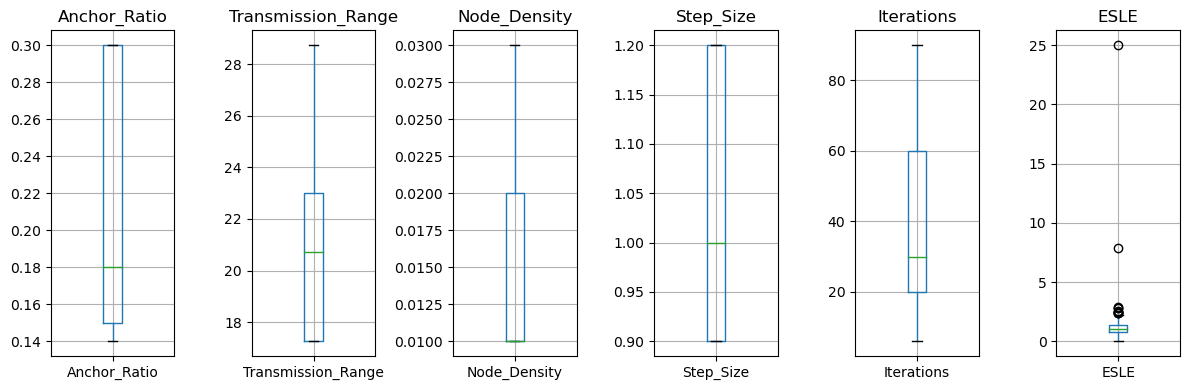

In [6]:
# Determine the number of variables
num_variables = len(data.columns)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_variables, figsize=(12, 4))

# Generate individual boxplots for each variable
for i, column in enumerate(data.columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

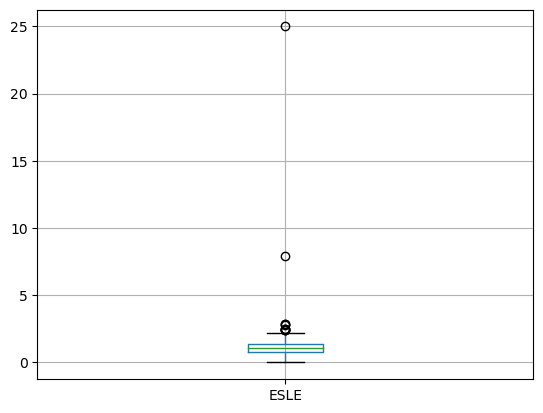

In [7]:
# Display the plot
data.boxplot(column='ESLE')
plt.show()

Checking histograms (to see if we'll fit features to a close enough distribution)

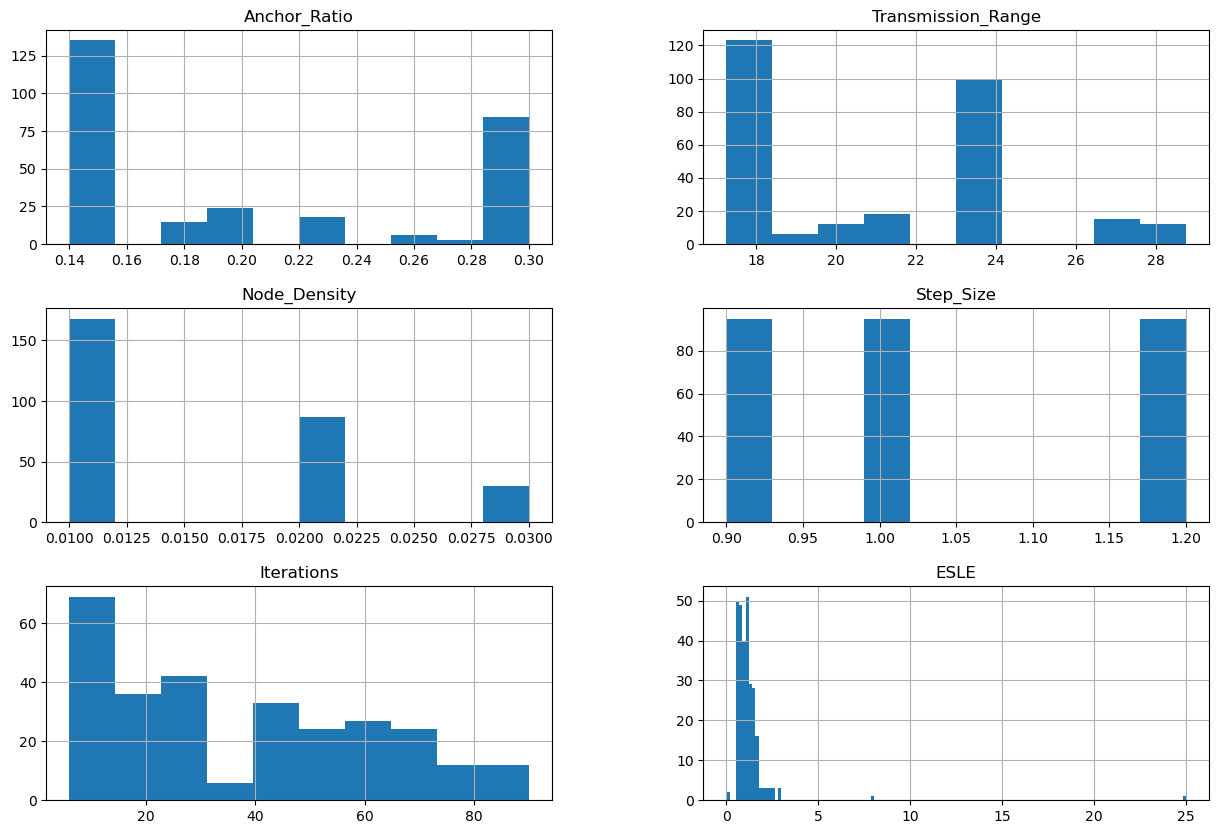

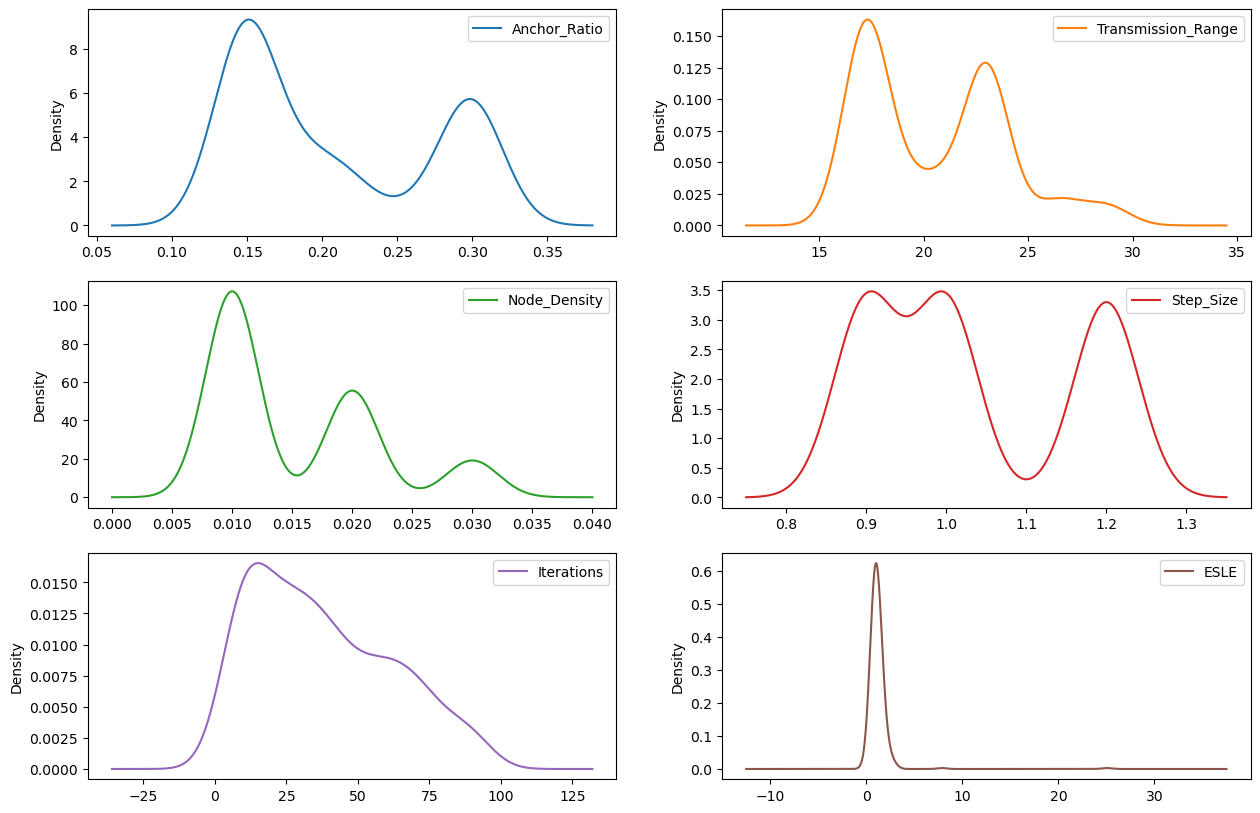

In [8]:
# Histogram of the dataset
data.hist(figsize=(15, 10), bins="auto")
plt.show()

# density plot of the dataset
data.plot(kind='density', subplots=True, layout=(3,2), sharex=False, figsize=(15, 10))
plt.show()

In [51]:
# Creating a dictionary to store the fitted distributions
fitted_distributions = {}

# Iterating over each feature
for feature in data.columns:
    # Extracting the data for the current feature
    
    feature_data = data[feature].values
    
    # Creating an instance of the Fitter class for the current feature
    f = Fitter(feature_data) #,distributions=get_common_distributions()
    
    # Fitting the distributions for the current feature
    f.fit()
    
    # Storing the fitted distributions in the dictionary
    fitted_distributions[feature] = f


Fitting 110 distributions:  38%|███▊      | 42/110 [00:04<00:05, 11.37it/s]/home/gustavo/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 110 distributions:  97%|█████████▋| 107/110 [00:22<00:04,  1.52s/it]/home/gustavo/anaconda3/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 110 distr

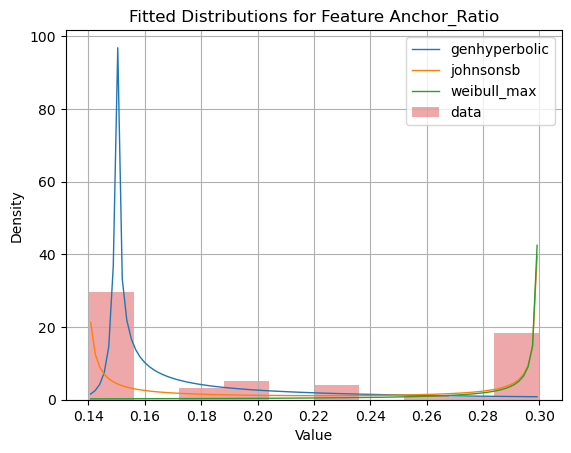

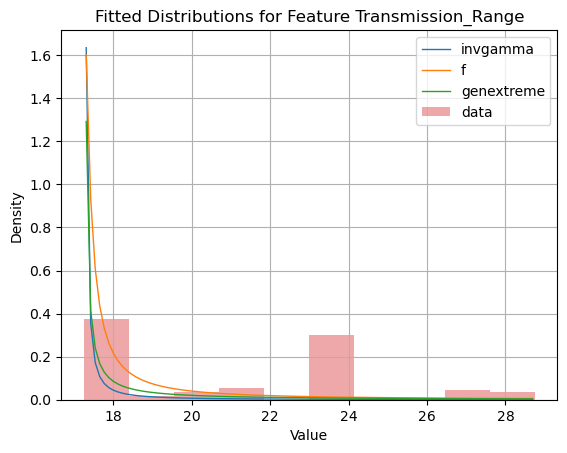

/home/gustavo/anaconda3/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


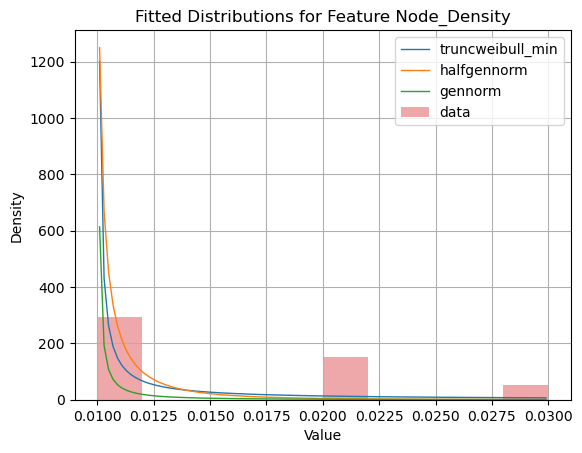

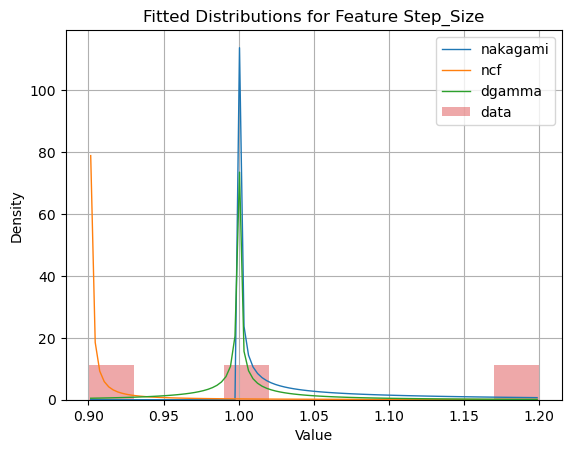

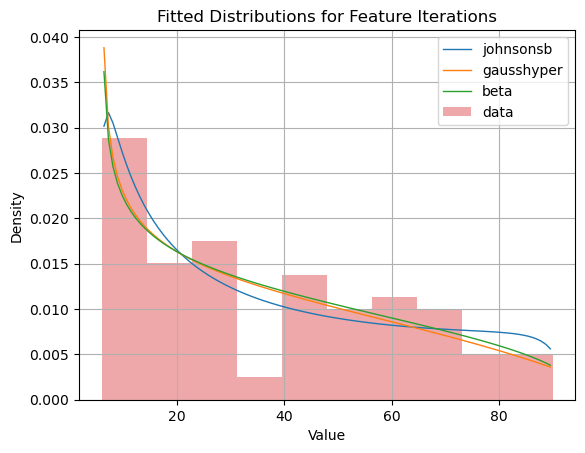

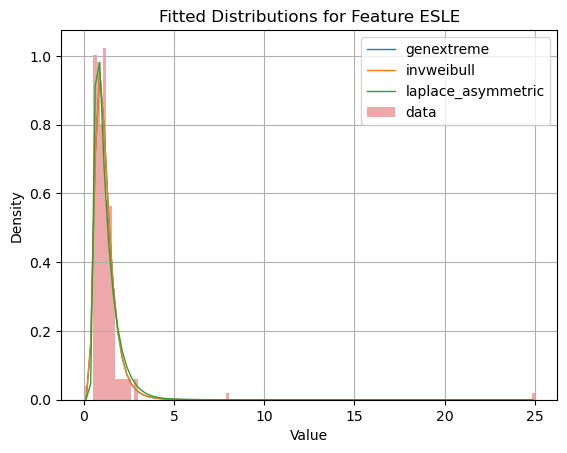

In [52]:
# Plotting the fitted distributions to the data
def plot_distributions(selected_feature, how_many_dist=3):
    fitted_dist = fitted_distributions[selected_feature]
    
    # Plotting the fitted distributions
    fitted_dist.plot_pdf(Nbest=how_many_dist, lw=1)
    
    # Plotting the histogram of the data
    plt.hist(data[selected_feature], bins='auto', density=True, alpha=0.4, label='data')
    
    # Setting the plot title and axes labels
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Fitted Distributions for Feature {}'.format(selected_feature))
    
    # Displaying the legend
    plt.legend()
    
    # Displaying the plot
    plt.show()


# actual results
for feature in data.columns:
    plot_distributions(feature, 3)

In [53]:
# getting the parameters of the best fitted distributions

# parameters of the features we want to fit
params_iterations = fitted_distributions['Iterations'].fitted_param['johnsonsb']
params_esle = fitted_distributions['ESLE'].fitted_param['genextreme']

# saving the parameters to a pickle file
with open('params.pkl', 'wb') as f:
    pickle.dump([params_iterations, params_esle], f)

In [13]:
# unpacking the parameters, from pickle file
with open('params.pkl', 'rb') as f:
    params_iterations, params_ESLE = pickle.load(f)


np.random.seed(7)


In [63]:
# this is the first way we generated the transformed data, but this way we were losing its order

# Generating new data using these parameters
new_Iterations = stats.johnsonsb.rvs(*params_iterations, size=len(data['Iterations']))
new_ESLE = stats.genextreme.rvs(*params_ESLE, size=len(data['ESLE']))

However, the way we did it, the data's order is not preserved, so we need to change this.

In [14]:
# we already have the parameters of the fitted distributions, since we saved them in a pickle file, and have already unpacked them

# Generating new data using these parameters
new_iterations_unordered = stats.johnsonsb.rvs(*params_iterations, size=len(data['Iterations']))
new_ESLE_unordered = stats.genextreme.rvs(*params_ESLE, size=len(data['ESLE']))

# Calculating the quantiles of the original data
quantiles_iterations = stats.rankdata(data['Iterations'], method='ordinal') / len(data['Iterations'])
quantiles_ESLE = stats.rankdata(data['ESLE'], method='ordinal') / len(data['ESLE'])

# Calculating the quantiles of the new data
new_Iterations = np.quantile(np.sort(new_iterations_unordered), quantiles_iterations)
new_ESLE = np.quantile(np.sort(new_ESLE_unordered), quantiles_ESLE)

# Now new_iterations and new_ESLE contain newly generated data with preserved order

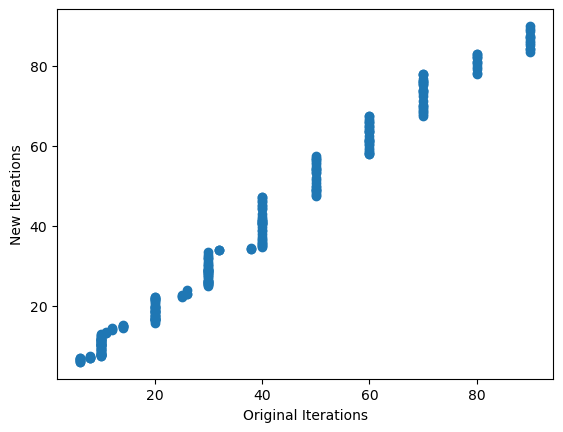

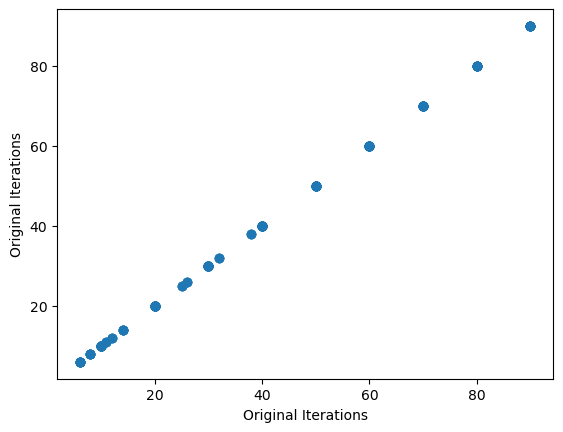

In [15]:
# let's check if the order is preserved
plt.scatter(data['Iterations'], new_Iterations)
plt.xlabel('Original Iterations')
plt.ylabel('New Iterations')
plt.show()

# agains the control, i.e. the original data vs the original data
plt.scatter(data['Iterations'], data['Iterations'])
plt.xlabel('Original Iterations')
plt.ylabel('Original Iterations')
plt.show()


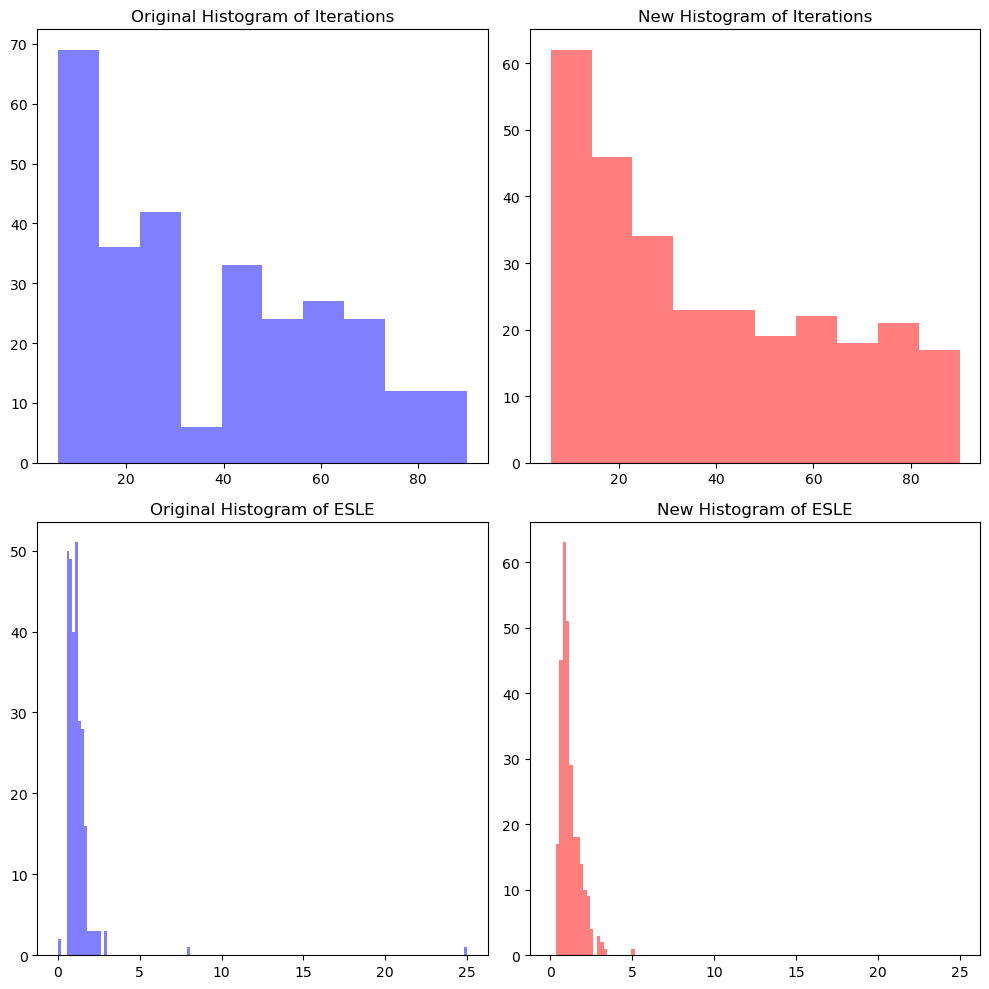

In [ ]:
# comparing the histograms of the original and new data
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plotting old histogram for Iterations
ax[0, 0].hist(data['Iterations'], bins='auto', alpha=0.5, color='blue')
ax[0, 0].set_title('Original Histogram of Iterations')

xmin1, xmax1 = ax[0, 0].get_xlim()

# Plotting new histogram for Iterations
ax[0, 1].hist(new_Iterations, bins='auto', alpha=0.5, color='red')
ax[0, 1].set_xlim([xmin1, xmax1])  # setting the same x-axis limits
ax[0, 1].set_title('New Histogram of Iterations')

# Plotting old histogram for ESLE
ax[1, 0].hist(data['ESLE'], bins='auto', alpha=0.5, color='blue')
ax[1, 0].set_title('Original Histogram of ESLE')

xmin2, xmax2 = ax[1, 0].get_xlim()

# Plotting new histogram for ESLE
ax[1, 1].hist(new_ESLE, bins='auto', alpha=0.5, color='red')
ax[1, 1].set_xlim([xmin2, xmax2])  # setting the same x-axis limits
ax[1, 1].set_title('New Histogram of ESLE')

plt.tight_layout()
plt.show()


In [17]:
# finally, let's create an update dataset with the two fitted features
new_data = data.copy()
new_data['Iterations'] = new_Iterations
new_data['ESLE'] = new_ESLE

## Data Preprocessing 

### Data Cleaning

- No incomplete data
- Is there noisy data? (no indication for errors, nor outlier, but might there be outliers?)
- No inconsistent data
- Is there intentional data? (certainly doesn't seem like so)

In [18]:
# Verify if there are any missing values
print(data.isnull().sum())

# Boxplot: ends of the box are the quartiles; median is marked; add
# whiskers, and plot outliers individually
# 1.5 x IQR rule
# Calculate the IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


# get data only with iterations column value < 20
data_outliers = data[data['Iterations'] < 20]

# Get observations with above or qual to 1.5 x IQR rule 
data_outliers = ((data_outliers < (Q1 - 1.5 * IQR)) | (data_outliers > (Q3 + 1.5 * IQR))) 

# Print observations with above or qual to 1.5 x IQR rule 
outliers_to_visualize = data_outliers[data_outliers.any(axis=1)]

# Remove observations in the outliers_to_visualize from the data
data_wout_outliers = data.drop(outliers_to_visualize.index, axis=0)


Anchor_Ratio          0
Transmission_Range    0
Node_Density          0
Step_Size             0
Iterations            0
ESLE                  0
dtype: int64


### Data Integration

- combine data from different sources. are there different sources? (no)
- any different scale / unit problems? (better check)
- any redudant features? (correlation analysis, covariance analysis) (should delve further)

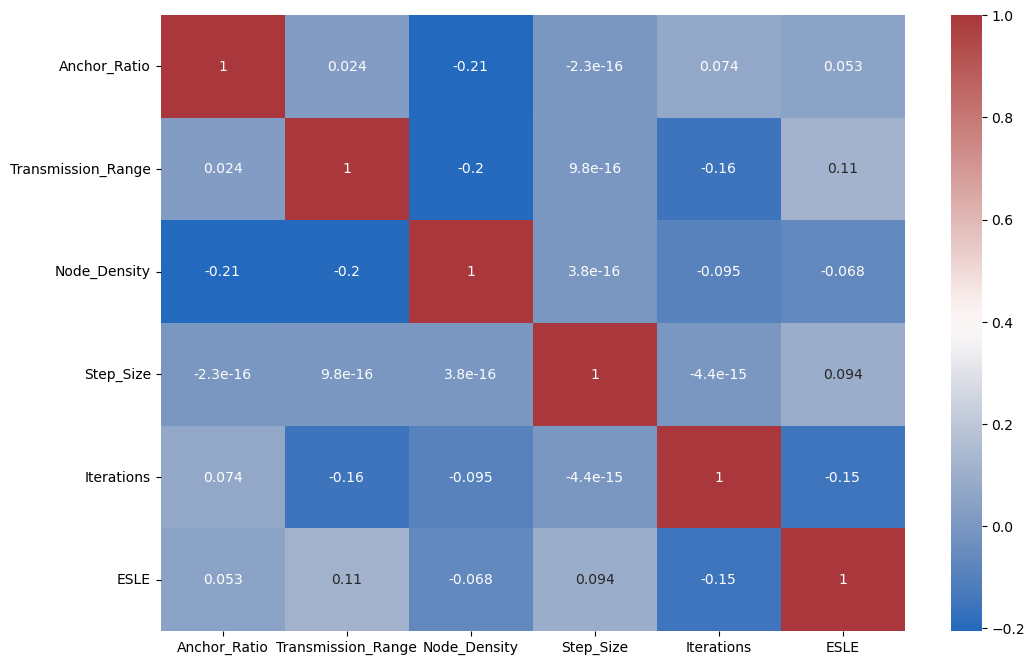

In [19]:
# correlation analysis of the dataset (Pearson's correlation coefficient)
plt.figure(figsize=(12, 8))
colour = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(data.corr(), annot=True, cmap=colour)
plt.show()

Since we had so few features, and the results weren't super relevant, we chose not to act on the correlation matrix, so we didn't perform feature selection in the end.

# Creating the models

#### Transform Data

In [90]:
# copy dataset data
data_copy = data_wout_outliers.copy()

# split dataset into input and output variables, y is the last column
X = data_copy.iloc[:, :-1]
y = data_copy.iloc[:, -1]


# Define seed for reproducibility
seed = 42

# assuming X and y are your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Normalize the data between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler object to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


#### Ploting data 

In [91]:
# plotting the results
def plot_results(y_test, y_pred):
    plt.scatter(y_test, y_pred, color='blue')
    plt.title('MLP regressor model')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()

#### Save Model


In [92]:
def save_model(model, filename):
    # save model
    pickle.dump(model, open(filename, "wb"))

def load_model(filename):
    # load model
    loaded_model = pickle.load(open(filename, "rb"))
    return loaded_model

#### Metric

In [93]:
def metric_evaluation(y_test, y_pred):
    # RMSE 
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    # R2 score
    print("R2 score: ", r2_score(y_test, y_pred))


### MLP 

In [94]:
# Setting the seed for reproducibility
np.random.seed(2259)

# Define the model
model = MLPRegressor(activation='logistic', solver='sgd', early_stopping=True,
                     max_iter=200, validation_fraction=0.2, learning_rate='adaptive',
                     batch_size=128, n_iter_no_change=20, tol=1e-4)

# Define the grid of hyperparameters to search
parameter_space = {
    'hidden_layer_sizes': [(10,), (10,5), (10,10), (50,), (100,), (100, 5), (100, 10), (50, 50), (100, 5)],
    'learning_rate_init': [0.0001, 0.001, 0.005, 0.01, 0.1],
    'alpha': [0, 0.0001, 0.001, 0.01]
}

# Set up the grid search 
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5) # cv = number of folds

# Fit the model on the training data
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Predict on the test set using the best parameters
y_pred = clf.predict(X_test)

# Root mean squared deviation
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

save_model(clf, 'model.pickle')

/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gustavo/anaconda3/lib/pyth

Best parameters found:
 {'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}
-0.502 (+/-1.281) for {'alpha': 0, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.0001}
-0.078 (+/-0.112) for {'alpha': 0, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001}
-0.056 (+/-0.119) for {'alpha': 0, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.005}
-0.045 (+/-0.091) for {'alpha': 0, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.479 (+/-0.474) for {'alpha': 0, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}
-0.656 (+/-0.660) for {'alpha': 0, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.0001}
-0.024 (+/-0.032) for {'alpha': 0, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.001}
-0.074 (+/-0.178) for {'alpha': 0, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.005}
-0.085 (+/-0.167) for {'alpha': 0, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.01}
0.266 (+/-0.595) for {'alpha': 0, 'hidden_layer_sizes': (10,

/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [95]:
# create MLPRegressor model
model = MLPRegressor(activation='logistic', solver='sgd', early_stopping=True,
                     max_iter=200, validation_fraction=0.2, learning_rate='adaptive',
                     batch_size=128, n_iter_no_change=20, tol=1e-4, hidden_layer_sizes=(10,), learning_rate_init=0.1, alpha=0.01)

rmse_mean = []
r2_mean = []

for i in range(100):

    # train the model
    model.fit(X_train, y_train)

    # predict on the test data
    y_pred = model.predict(X_test)

    # calculate the MRSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_mean.append(rmse)
    r2_mean.append(r2_score(y_test, y_pred))
    #print(f"Mean Squared Error on Test Data: {mse}")

    #print('Coefficient of determination (regression score function): %.2f' % r2_score(y_test, y_pred))
#RMSE
print(f"RMSE on Test Data: {np.mean(rmse_mean)}")
print(f"R2 score on Test Data: {np.mean(r2_mean)}")
#plot_results(y_test, y_pred)


/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gustavo/anaconda3/lib/pyth

RMSE on Test Data: 0.2191233151311542
R2 score on Test Data: 0.6169293902218245


/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### CNN

In [96]:
# reshape the data to 3D for CNN input
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the model
model = Sequential()
model.add(Conv1D(32, 2, activation='sigmoid', input_shape=(X_train_cnn.shape[1], 1)))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])

mse_mean_cnn = []

for i in range(100):

    # Fit the model
    history = model.fit(X_train_cnn, 
                        y_train, 
                        validation_split=0.2, 
                        epochs=100, 
                        batch_size=128, 
                        verbose=0, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=4)])

    # Predict on the test data
    y_pred = model.predict(X_test_cnn)

    # calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_mean_cnn.append(mse)
    #print(f"Mean Squared Error on Test Data: {mse}")


# printing RMSE
print(f"RMSE on Test Data: {np.mean(np.sqrt(mse_mean_cnn))}")
# printing R2 score
print(f"R2 score on Test Data: {np.mean(r2_score(y_test, y_pred))}")

"""
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
"""

2/2 [==============================] - 0s 4ms/step
RMSE on Test Data: 0.3277224597834817
R2 score on Test Data: 0.39869498602480413


"\n# plot training and validation loss\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.title('Model loss')\nplt.ylabel('Loss')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Validation'], loc='upper right')\nplt.show()\n"